## Cumputer Vision
### Module 2. Image segmentation and correspondence problems
    
Anastasiia Kasprova

Link to Google Colab: https://colab.research.google.com/drive/13PFdcBcdmqH2eWD1DOxhgxS7-OZ4RHfX

### Task 2.5: Given 4 pairs of points ﬁnd projective transformation and apply it to an image. Do not use cv2.getPerspectiveTransform

In [1]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow
from numpy.linalg import inv

In [2]:
#read image
img = cv2.imread("../../images/correspondence/cvbook.jpg")

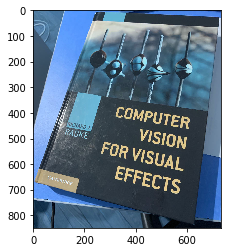

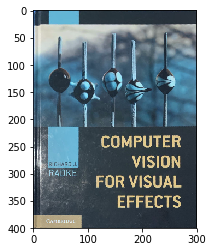

In [3]:
# implement function - cv2.getPerspectiveTransform(pts1,pts2) using numpy
def my_getPerspectiveTransform(pts1,pts2):
    """
    Matrix of transformations H can be found by solving the system of linear equations:
    ------------
      |xi'|    |x'|
    wi|yi'| - H|y'| = 0 (1)
      | 1 |    |1 |
    
    w1 = 1 (2)
    ------------
    or we can represent it as:
    | x0, y0,  1,  0,  0,  0,  0,  0,  0,-x0',   0,   0,   0| |h11|   |0|   
    |  0,  0,  0, x0, y0,  1,  0,  0,  0,-y0',   0,   0,   0| |h12|   |0| 
    |  0,  0,  0,  0,  0,  0, x0, y0,  1,  -1,   0,   0,   0| |h13|   |0| 
    | x1, y1,  1,  0,  0,  0,  0,  0,  0,   0,-x1',   0,   0| |h21|   |0|  
    |  0,  0,  0, x0, y0,  1,  0,  0,  0,   0,-y1',   0,   0| |h22|   |0| 
    |  0,  0,  0,  0,  0,  0, x1, y1,  1,   0,  -1,   0,   0| |h23|   |0| 
    | x2, y2,  1,  0,  0,  0,  0,  0,  0,   0,   0,-x2',   0| |h31| = |0|
    |  0,  0,  0, x0, y0,  1,  0,  0,  0,   0,   0,-y2',   0| |h32|   |0| 
    |  0,  0,  0,  0,  0,  0, x1, y1,  1,   0,   0,  -1,   0| |h33|   |0| 
    | x3, y3,  1,  0,  0,  0,  0,  0,  0,   0,   0,   0,-x3'| | w0|   |0| 
    |  0,  0,  0, x3, y3,  1,  0,  0,  0,   0,   0,   0,-y3'| | w1|   |0| 
    |  0,  0,  0,  0,  0,  0, x3, y3,  1,   0,   0,   0,  -1| | w2|   |0| 
    |  0,  0,  0,  0,  0,  0,  0,  0,  0,   1,   0,   0,   0| | w3|   |1| 
    
    In function notation:
    A * C = B
    C =  A_inv * B
    
    From C we need only elements which correspond to transformation matrix
    |h11 h12 h13|
    |h21 h22 h23|
    |h31 h32 h33|
    
    
    Input: 
        pts1 - 2D array of initial 4 points having the following structure:
            np.array([[x0,y0],[x1,y1],[x2,y2],[x3,y3]])
        pts2 - 2D array of result 4 points having the following structure:
            np.array([[x'0,y'0],[x'1,y'1],[x'2,y'2],[x'3,y'3]])
    Output:
        2D array of coefficients, having the followign structure
            np.array([[h11,h12,h13],[h21,h22,h23],[h31,h32,h33]])
    """
    A = np.float32([[pts1[0][0],pts1[0][1],1,0,0,0,0,0,0,-pts2[0][0],0,0,0],
          [0,0,0,pts1[0][0],pts1[0][1],1,0,0,0,-pts2[0][1],0,0,0],
          [0,0,0,0,0,0,pts1[0][0],pts1[0][1],1,-1,0,0,0],
          [pts1[1][0],pts1[1][1],1,0,0,0,0,0,0,0,-pts2[1][0],0,0],
          [0,0,0,pts1[1][0],pts1[1][1],1,0,0,0,0,-pts2[1][1],0,0],
          [0,0,0,0,0,0,pts1[1][0],pts1[1][1],1,0,-1,0,0],
          [pts1[2][0],pts1[2][1],1,0,0,0,0,0,0,0,0,-pts2[2][0],0],
          [0,0,0,pts1[2][0],pts1[2][1],1,0,0,0,0,0,-pts2[2][1],0],
          [0,0,0,0,0,0,pts1[2][0],pts1[2][1],1,0,0,-1,0],
          [pts1[3][0],pts1[3][1],1,0,0,0,0,0,0,0,0,0,-pts2[3][0]],
          [0,0,0,pts1[3][0],pts1[3][1],1,0,0,0,0,0,0,-pts2[3][1]],
          [0,0,0,0,0,0,pts1[3][0],pts1[3][1],1,0,0,0,-1],
          [0,0,0,0,0,0,0,0,0,1,0,0,0]
         ])
    B = np.float32([0,0,0,0,0,0,0,0,0,0,0,0,1])
    
    return np.array(np.dot(inv(A),B)[:9]/np.dot(inv(A),B)[8]).reshape((3, 3))


#manually figured out the location of the corners of the book
pts1 = np.float32([[241,6], [726,29], [6,668], [627,837]])
pts2 = np.float32([[0,0], [300,0], [0,400], [300,400]])
#initiation
my_H = my_getPerspectiveTransform(pts1,pts2)

result = cv2.warpPerspective(img,my_H,(300, 400))

plt.figure(1)
plt.imshow(img,cmap='gray')
plt.figure(2) 
plt.imshow(result,cmap='gray')
plt.show()

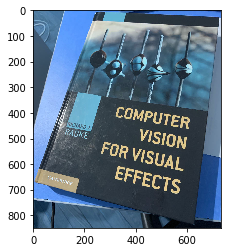

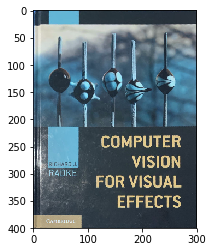

In [4]:
# Open CV realization
H = cv2.getPerspectiveTransform(pts1,pts2)
result = cv2.warpPerspective(img,H,(300, 400))

plt.figure(1)
plt.imshow(img,cmap='gray')
plt.figure(2) 
plt.imshow(result,cmap='gray')
plt.show()

In [5]:
#compare results of CV2 build in function and function written by me:)
print("CV2 M: ",H)
print("My M: ", my_H)

CV2 M:  [[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]
My M:  [[ 7.5349671e-01  2.6747996e-01 -1.8319759e+02]
 [-3.9922800e-02  8.4185034e-01  4.5702925e+00]
 [ 3.0392280e-04  6.2109792e-04  1.0000000e+00]]
